# IMDB Analysis

In [434]:
import pandas as pd

In [435]:
df=pd.read_csv('IMDB_Movies.csv')

In [436]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


Task 1: Determine the most common genres of movies in the dataset. Then, for each genre, calculate descriptive statistics (mean, median, mode, range, variance, standard deviation) of the IMDB scores.


In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [438]:
df['genres'].unique()  #this shows the excessive amount of unique genres 

array(['Action|Adventure|Fantasy|Sci-Fi', 'Action|Adventure|Fantasy',
       'Action|Adventure|Thriller', 'Action|Thriller', 'Documentary',
       'Action|Adventure|Sci-Fi', 'Action|Adventure|Romance',
       'Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance',
       'Adventure|Family|Fantasy|Mystery', 'Action|Adventure',
       'Action|Adventure|Western', 'Action|Adventure|Family|Fantasy',
       'Action|Adventure|Comedy|Family|Fantasy|Sci-Fi',
       'Adventure|Fantasy', 'Action|Adventure|Drama|History',
       'Adventure|Family|Fantasy', 'Action|Adventure|Drama|Romance',
       'Drama|Romance', 'Action|Adventure|Sci-Fi|Thriller',
       'Action|Adventure|Fantasy|Romance',
       'Action|Adventure|Fantasy|Sci-Fi|Thriller',
       'Adventure|Animation|Comedy|Family|Fantasy',
       'Adventure|Animation|Comedy|Family|Sport', 'Action|Crime|Thriller',
       'Action|Adventure|Horror|Sci-Fi|Thriller',
       'Adventure|Animation|Family|Sci-Fi',
       'Action|Comedy|Crime|Thrille

In [439]:
df['main_genre']=df['genres'].str.split('|').str.get(0) #taking only the first genre making it the main_genre

In [440]:
df['main_genre'].value_counts()#from here we know the top genre 

main_genre
Comedy         1329
Action         1153
Drama           972
Adventure       453
Crime           349
Biography       252
Horror          232
Documentary      84
Animation        61
Fantasy          53
Mystery          33
Thriller         22
Sci-Fi           13
Western          12
Family           11
Romance           6
Musical           4
Game-Show         1
Music             1
Film-Noir         1
History           1
Name: count, dtype: int64

In [441]:
df1=df[['main_genre','imdb_score']]

In [442]:
#creating the genreise stats
stats= df1.groupby('main_genre')['imdb_score'].agg(
    mean='mean',
    median='median',
    mode=lambda x: x.mode().iat[0] if not x.mode().empty else None,
    range=lambda x: x.max() - x.min(),
    standard_deviation='std',
    variance='var'
).reset_index()

stats=pd.DataFrame(stats)


,main_genre,mean,median,mode,range,standard_deviation,variance
0,Action,6.239896,6.30,6.1,7.4,1.118835,1.251792
1,Adventure,6.525166,6.70,6.7,6.3,1.119115,1.252418
2,Animation,6.631148,6.90,7.1,4.7,1.187650,1.410514
3,Biography,7.159127,7.20,7.0,4.4,0.693364,0.480753
4,Comedy,6.198194,6.30,6.4,7.6,1.087475,1.182602
5,Crime,6.906877,7.00,7.4,6.2,0.976658,0.953861
6,Documentary,7.167857,7.45,7.5,7.1,1.187400,1.409918
7,Drama,6.767181,6.90,6.7,7.1,0.997031,0.994071
8,Family,5.709091,5.70,5.7,5.8,1.967463,3.870909
9,Fantasy,6.445283,6.60,6.8,3.6,0.899266,0.808679


In [443]:
#adding a function to add color
def color_negative_red(val):
    if isinstance(val, (int, float)):
        color = 'red' if val < 0 else 'cyan'
        return f'color: {color}'
    else:
        return ''

In [444]:
styled_stats = stats.style.applymap(color_negative_red)
styled_stats

,main_genre,mean,median,mode,range,standard_deviation,variance
0,Action,6.239896,6.300000,6.100000,7.400000,1.118835,1.251792
1,Adventure,6.525166,6.700000,6.700000,6.300000,1.119115,1.252418
2,Animation,6.631148,6.900000,7.100000,4.700000,1.187650,1.410514
3,Biography,7.159127,7.200000,7.000000,4.400000,0.693364,0.480753
4,Comedy,6.198194,6.300000,6.400000,7.600000,1.087475,1.182602
5,Crime,6.906877,7.000000,7.400000,6.200000,0.976658,0.953861
6,Documentary,7.167857,7.450000,7.500000,7.100000,1.187400,1.409918
7,Drama,6.767181,6.900000,6.700000,7.100000,0.997031,0.994071
8,Family,5.709091,5.700000,5.700000,5.800000,1.967463,3.870909
9,Fantasy,6.445283,6.600000,6.800000,3.600000,0.899266,0.808679


Task 2: Analyze the distribution of movie durations and identify the relationship between movie duration and IMDB score.


In [445]:
correlation = df['duration'].corr(df['imdb_score'])
print(f"Correlation between Movie Duration and IMDB Score: {correlation}")#checking correlation

Correlation between Movie Duration and IMDB Score: 0.26166152097667716


In [446]:
import matplotlib.pyplot as plt
import seaborn as sns

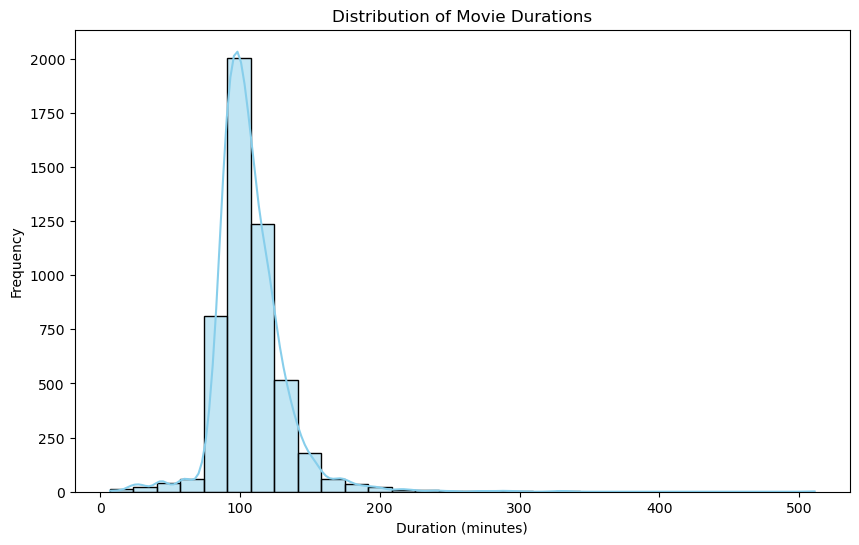

In [447]:
#using distplot to show distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='duration', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

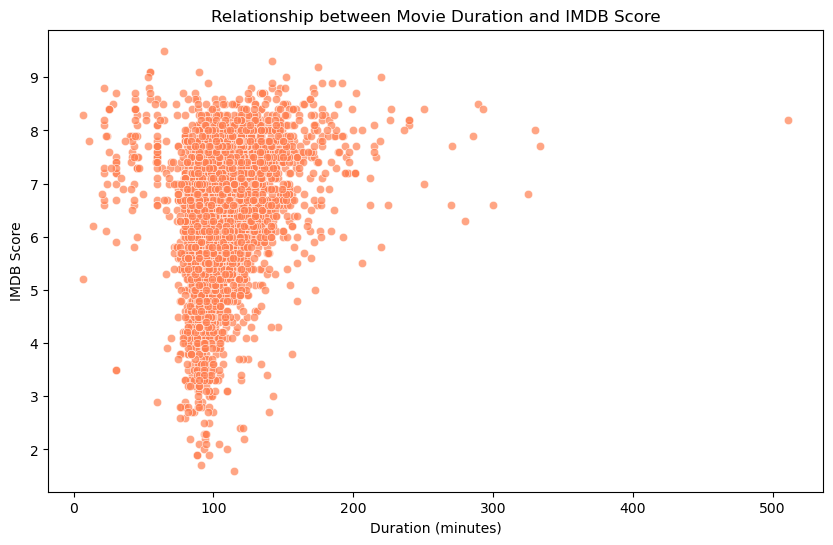

In [448]:
#using scater plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='duration', y='imdb_score', color='coral', alpha=0.7)
plt.title('Relationship between Movie Duration and IMDB Score')
plt.xlabel('Duration (minutes)')
plt.ylabel('IMDB Score')
plt.show()


Task 3:Determine the most common languages used in movies and analyze their impact on the IMDB score using descriptive statistics.

In [449]:
#finding the top languages
top_languages = df['language'].value_counts().head(10).index
top_languages

Index(['English', 'French', 'Spanish', 'Hindi', 'Mandarin', 'German',
       'Japanese', 'Cantonese', 'Russian', 'Italian'],
      dtype='object', name='language')

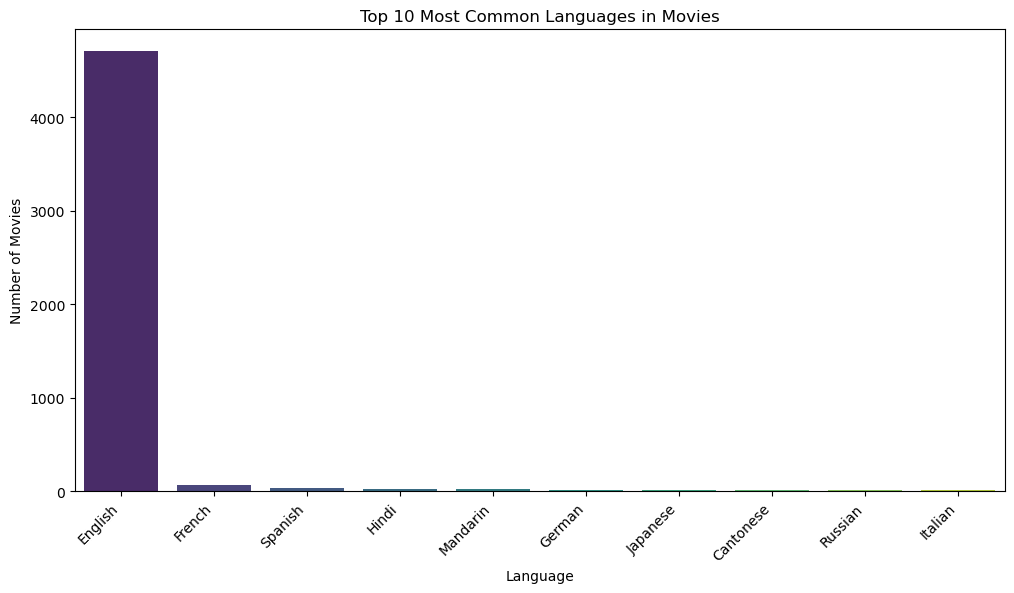

In [450]:
#barplot for language with most movies
plt.figure(figsize=(12, 6))
sns.barplot(x=top_languages, y=df['language'].value_counts().head(10).values, palette='viridis')
plt.title('Top 10 Most Common Languages in Movies')
plt.xlabel('Language')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

In [451]:
#language  statistics
top_languages_movies = df[df['language'].isin(top_languages)]
language_stats = top_languages_movies.groupby('language')['imdb_score'].describe()

language_stats = language_stats.style.applymap(color_negative_red)
language_stats

,count,mean,std,min,25%,50%,75%,max
language,,,,,,,,
Cantonese,11.000000,6.954545,0.704789,5.300000,6.600000,7.200000,7.400000,7.800000
English,4704.000000,6.398427,1.122068,1.600000,5.800000,6.500000,7.200000,9.500000
French,73.000000,7.038356,0.726986,4.900000,6.600000,7.200000,7.500000,8.400000
German,19.000000,7.342105,0.954123,4.900000,7.050000,7.600000,7.900000,8.500000
Hindi,28.000000,6.632143,1.398956,2.800000,5.850000,6.950000,7.800000,8.500000
Italian,11.000000,7.227273,1.244260,5.100000,6.700000,7.300000,8.050000,8.900000
Japanese,18.000000,7.394444,0.990824,5.600000,6.600000,7.600000,8.200000,8.700000
Mandarin,26.000000,6.788462,1.042047,3.200000,6.200000,7.050000,7.575000,7.900000
Russian,11.000000,6.363636,1.383671,4.100000,5.300000,6.500000,7.700000,8.100000


Task 4 :Identify the top directors based on their average IMDB score and analyze their contribution to the success of movies using percentile calculations.


In [452]:
top_directors = df.groupby('director_name')['imdb_score'].mean().sort_values(ascending=False).head(10)
top_directors

director_name
John Blanchard      9.5
Mitchell Altieri    8.7
Sadyk Sher-Niyaz    8.7
Cary Bell           8.7
Mike Mayhall        8.6
Charles Chaplin     8.6
Majid Majidi        8.5
Ron Fricke          8.5
Damien Chazelle     8.5
Raja Menon          8.5
Name: imdb_score, dtype: float64

In [461]:
director_percentiles = df.groupby('director_name')['imdb_score'].describe(percentiles=[.25, .50, .75, .90, .95, .99])

director_percentiles  #percentile analysis for directors 

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
director_name,,,,,,,,,,,
A. Raven Cruz,1.0,1.9,NaN,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9
Aaron Hann,1.0,6.0,NaN,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
Aaron Schneider,1.0,7.1,NaN,7.1,7.1,7.1,7.1,7.1,7.1,7.1,7.1
Aaron Seltzer,1.0,2.7,NaN,2.7,2.7,2.7,2.7,2.7,2.7,2.7,2.7
Abel Ferrara,1.0,6.6,NaN,6.6,6.6,6.6,6.6,6.6,6.6,6.6,6.6
...,...,...,...,...,...,...,...,...,...,...,...
Zoran Lisinac,1.0,7.1,NaN,7.1,7.1,7.1,7.1,7.1,7.1,7.1,7.1
Álex de la Iglesia,1.0,6.1,NaN,6.1,6.1,6.1,6.1,6.1,6.1,6.1,6.1
Émile Gaudreault,1.0,6.7,NaN,6.7,6.7,6.7,6.7,6.7,6.7,6.7,6.7


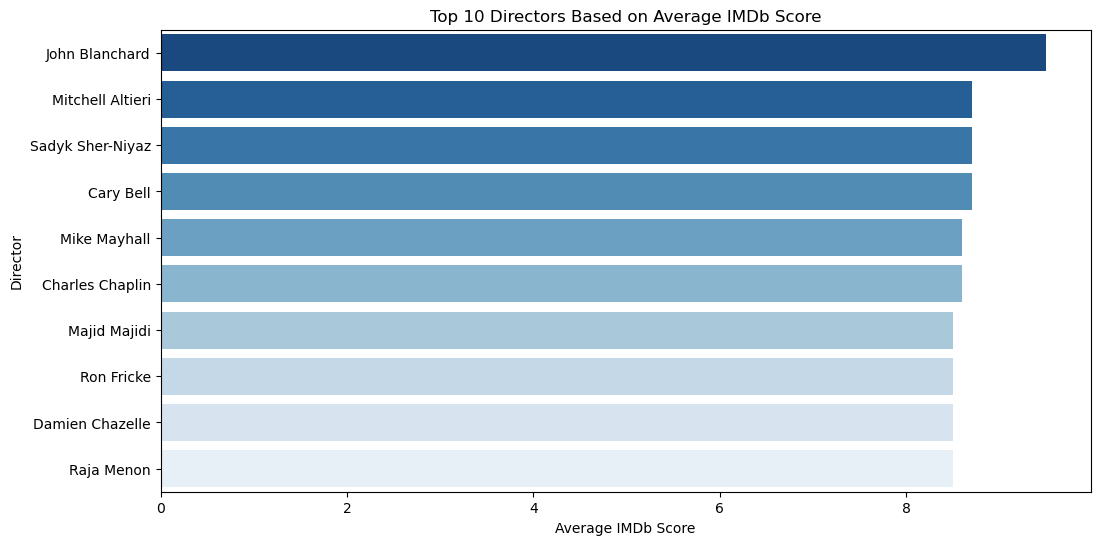

In [454]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_r')
plt.title('Top 10 Directors Based on Average IMDb Score')
plt.xlabel('Average IMDb Score')
plt.ylabel('Director')
plt.show()

Task 5: Analyze the correlation between movie budgets and gross earnings, and identify the movies with the highest profit margin.

In [455]:
correlation = df['budget'].corr(df['gross'])
correlation #movie budget and score correlation

0.1021794535130338

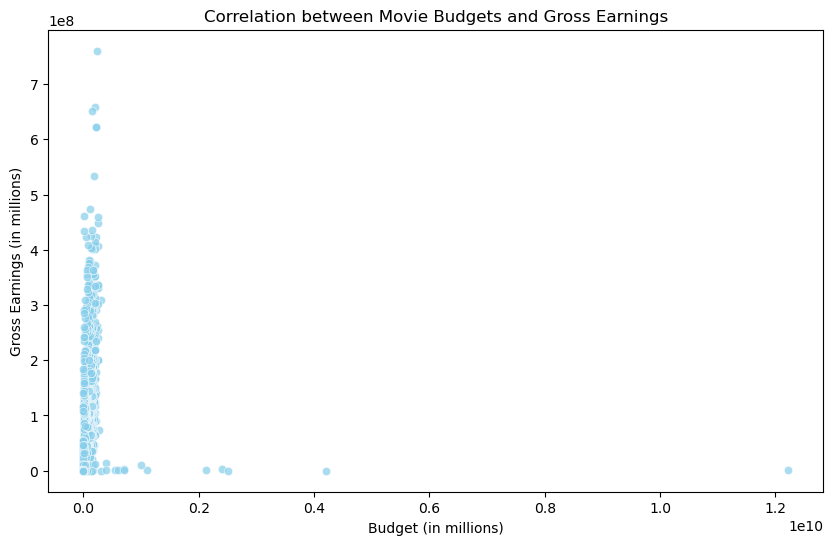

In [456]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='budget', y='gross', color='skyblue', alpha=0.7)
plt.title('Correlation between Movie Budgets and Gross Earnings')
plt.xlabel('Budget (in millions)')
plt.ylabel('Gross Earnings (in millions)')
plt.show()

#budget and box office correlation4

In [457]:
df['profit_margin'] = ((df['gross'] - df['budget']) / df['budget']) * 100


In [458]:
top_profit_margin_movies = df.nlargest(10, 'profit_margin')[['movie_title', 'profit_margin', 'budget', 'gross']]
top_profit_margin_movies
#movies with the largest profit margins

,movie_title,profit_margin,budget,gross
4793,Paranormal Activity,719348.553333,15000.0,107917283.0
4799,Tarnation,271466.055046,218.0,592014.0
4707,The Blair Witch Project,234116.856667,60000.0,140530114.0
4984,The Brothers McMullen,40886.400000,25000.0,10246600.0
3278,The Texas Chain Saw Massacre,36842.728535,83532.0,30859000.0
4936,The Texas Chain Saw Massacre,36842.728535,83532.0,30859000.0
5035,El Mariachi,29056.000000,7000.0,2040920.0
4956,The Gallows,22657.819000,100000.0,22757819.0
4977,Super Size Me,17637.489231,65000.0,11529368.0
2492,Halloween,15566.666667,300000.0,47000000.0
